# Python Lesson 4 Practice Assignment

1. Create a list that contains the names of the days of the week. Using a `for` loop, print the days of the week.


In [1]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for days in days_of_week:
    print(days)

Monday
Tuesday
Wednesday
Thursday
Friday
Saturday
Sunday


2. Using a `for` loop and the `.iterrows` method, print the month abbreviation and average temperature in Mesa for each month in 1879 together on the same line. (Remember that the month abbreviation is now the index for the row.) To make the output clearer, print a header explaining what the columns are before you print the values.

In [3]:
import pandas as pd
climate = pd.read_csv('https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/mesa_climate.csv')
climate_df = pd.DataFrame(climate)

print("Month Abbreviation\tAverage Temperature")
for index, row in climate_df.iterrows():
    print(row['month'], "\t\t\t", row['tavg'])


                 


Month Abbreviation	Average Temperature
Jan 			 12.1
Feb 			 10.1
Mar 			 11.8
Apr 			 19.2
May 			 25.0
Jun 			 28.1
Jul 			 32.4
Aug 			 32.2
Sep 			 28.2
Oct 			 19.5
Nov 			 14.5
Dec 			 8.7


3. **Calculating a mean using the procedural approach.** Create a variable called `sum` and set its value to zero. Create a `for` loop that steps through each month and adds the precipitation value for each month to the `sum` variable. Recall that

```
sum += number
```

is a shortcut for

```
sum = sum + number
```

After you add up all of the values, print the value of the average precipitation for all months of the year. (Don't worry about weighting the monthly values by the length of the month.)

In [16]:
sum = 0
for index, row in climate.iterrows():
    sum += row['ppt']

average_precipitation = sum / 12
print("Average Precipitation:", average_precipitation)


Average Precipitation: 19.041666666666668


4. **Calculating a mean using the vectorized approach.** Because pandas is designed for vectorized operations, there is an easier way to find the average precipitation for all of the months. Simply append the `.mean()` method to the precipitation column of the DataFrame. (The mean method does not require any arguments.) Print the result. Is it the same as what you got using the `for` loop?

In [26]:
import pandas as pd
avg_precip_df = pd.DataFrame(climate, columns=['ppt'])
mean_avg_precipitation = avg_precip_df.mean()
print("Mean Average Precipitation:", mean_avg_precipitation)

Mean Average Precipitation: ppt    19.041667
dtype: float64


5. Yale University has an awesome website known as "Is it chicken tenders day?".  The website is at <http://www.isitchickentendersday.com/> and you can read about it [here](https://yaledailynews.com/blog/2011/09/08/is-it-chicken-tenders-day-question-answered-in-new-website/).  Using the website, you can determine whether it is chicken tenders day (i.e. Thursday) in the Yale residential dining halls. The `date` object from the `datetime` module has a *method* that determines the day of the week as a number (0=Monday, 1=Tuesday, etc.).  It's `date.today().weekday()`. From the `datetime` module import the `date` object. Begin your script by printing the question "Is it chicken tenders day?". Then use `if` and `else` to print `yes` if it's chicken tenders day and`no` for any other day.

In [35]:
from datetime import date
print("Is it chicken tenders day?!?!?!?")
if date.today().weekday() == 3:
    print("Yes :D")
else: 
    print("No :(")

Is it chicken tenders day?!?!?!?
No :(


6. Create a list containing the names of the days of the week. Start with Monday and end with Sunday to match the numbering produced by the `.weekday()` method. Modify the program above by adding a line to tell the user what the day of the week is today. You can use the output of the `.weekday()` method as the index number when referring to your list.

In [43]:
# create a list containing the days of the week and mathc the numbering produced by the .weekday() method
from datetime import date
print("Is it chicken tenders day?!?!?!?")
if date.today().weekday() == 3:
    print("Yes :D")
else: 
    print("No, today is",days_of_week[date.today().weekday()],"!")


Is it chicken tenders day?!?!?!?
No, today is Monday !


7. Use an input statement to let the user enter a number as a string. In a `try:` code block, convert the entered string to a floating point number using `float()`. Follow the conversion statement with a statement that prints the number. In the `except:` code block, print a warning to the user that they didn't enter a number.

In [58]:
number_str = input("enter a number pls")
try:
    number_ft = float(number_str)
    print('your number is', number_ft)
except: 
    print("that's not a number!")


your number is 789.0


8. Create a Pyplot scatterplot with average precipitation on the X axis and average temperature on the Y axis. Lable the axes appropriately, including the units (mm for precipitation and degrees C for temperature).

Text(0, 0.5, 'average temperature (C)')

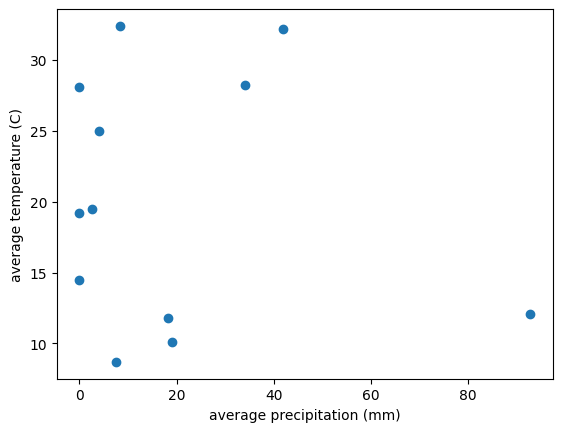

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
climate = pd.read_csv('https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/mesa_climate.csv')
climate = climate.set_index('month')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(climate.ppt, climate['tavg'])

ax.set_xlabel('average precipitation (mm)')
ax.set_ylabel('average temperature (C)')

9. Create another scatterplot using the same variables as above, but add a first order polynomial best fit line (trendline) to the graph. Make the scatterplot markers and trendline different colors and make sure your axes are labeled.

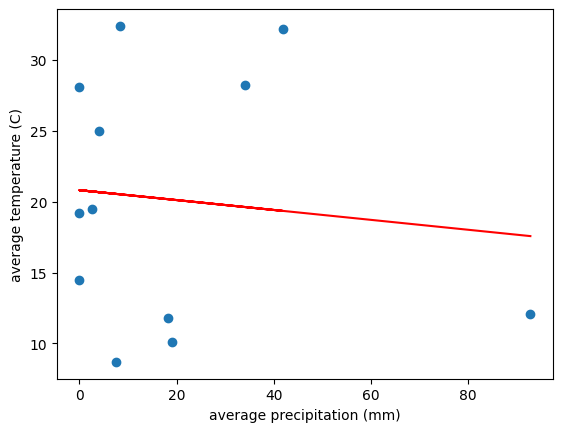

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
climate = pd.read_csv('https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/mesa_climate.csv')
climate = climate.set_index('month')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(climate.ppt, climate['tavg'])

ax.set_xlabel('average precipitation (mm)')
ax.set_ylabel('average temperature (C)')

# add a red trendline to my graph 
import numpy as np
m, b = np.polyfit(climate.ppt, climate['tavg'], 1)
plt.plot(climate.ppt, m*climate.ppt + b, color='red')



10. Create a bar chart with the month abbreviation on the X axis and the average precipitation on the Y axis. Label your axes appropriately.

Text(0, 0.5, 'average precipitation (mm)')

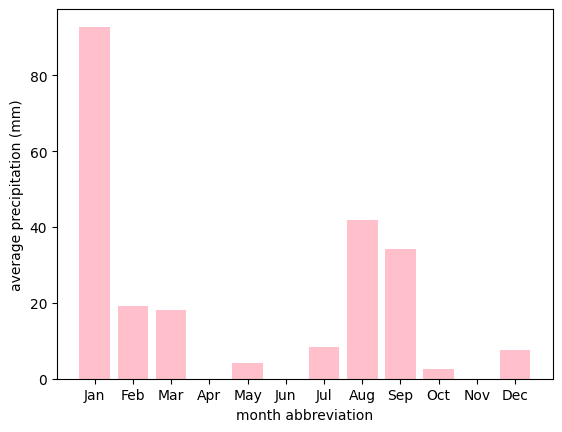

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
climate = pd.read_csv('https://github.com/HeardLibrary/digital-scholarship/raw/master/data/codegraf/mesa_climate.csv')
climate = climate.set_index('month')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(climate.index, climate['ppt'], color= 'pink')

ax.set_xlabel('month abbreviation')
ax.set_ylabel('average precipitation (mm)')